In [11]:
% matplotlib inline

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from math import log
from math import exp
from matplotlib import colors
from pylab import *
import geopandas as gpd

In [16]:
# make connection to all the scripts
sys.path.append(os.path.join( '..'))
from scripts.utils import load_config

In [17]:
# make connection to the data paths
data_path = load_config()['paths']['data']

In [18]:
# setup colorbar stuff
cmap = cmap = cm.get_cmap('Reds', 10)    # PiYG
get_colors = [matplotlib.colors.rgb2hex(cmap(x)[:3]) for x in range(cmap.N)]
get_ranges = [(0,0.001),(0.001,0.01),(0.01,0.1),(0.1,1),(1,5),(5,10),(10,25),(25,50),(50,75),(75,100)]

lookup_color = list(zip(get_ranges,get_colors))

# These don't need to constantly be redefined, especially edgecolor
facecolor = '#fffff2'
edgecolor = 'black'

In [31]:
#read data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.loc[(world.continent == 'Africa') | (world.name.isin(['Russia','Turkey','Ukraine','Belarus','Kosovo','Montenegro',
                                                           'Bosnia and Herz.','Macedonia','Moldova','Serbia','Libya']))]

europe = gpd.read_file(os.path.join(data_path,'input_data','NUTS3_ETRS.shp'))
europe = europe.loc[(europe['STAT_LEVL_']==2)]
europe = europe.to_crs(epsg=4326)

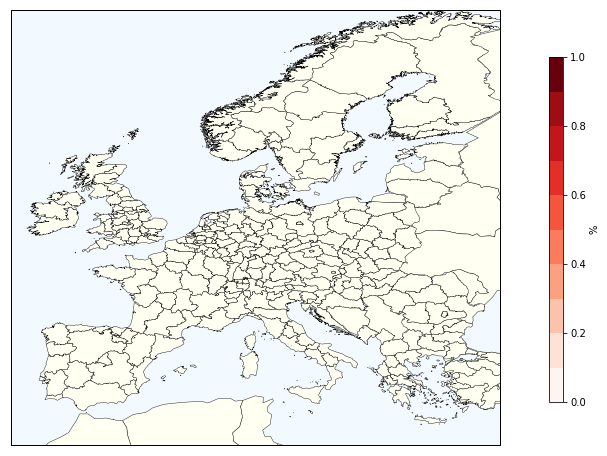

In [33]:
#plot figure
fig, ax = plt.subplots(figsize=(10, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

world.plot(ax = ax,color = facecolor,edgecolor=edgecolor,linewidth=0.3)

europe.plot(ax= ax, color = facecolor,edgecolor=edgecolor,linewidth=0.3)

ax.background_patch.set_facecolor('#f2f9ff')
ax.set_extent([-12, 31, 33, 70])
   # I decreased the indent of this, you only need to do it once per call to run()
#ax.set_title('Commercial sectors impacted on {}'.format(str(date)), fontsize=14,fontweight="bold")

cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap)
cb.set_label('%')    
#fig.savefig(os.path.join('..','Figures','calc','{}.png'.format(data)),dpi=60)
#plt.close(fig)
#fig.clear()